<a href="https://colab.research.google.com/github/Computational-physics-with-learning/pde-model-discovery/blob/main/SymbolicRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Symbolic Regression**



Symbolic regression (SR) is a machine learning technique that fits a model in the form of analytic expressions to observed data.

In conventional regression, a model is provided as a starting point and the parameters are optimised. For instance:  

*   a **linear** regression model is based on the assumption that the relationship of the dependent variables and regression is linear.
*   a neural network is a **nonlinear** model which relies on a predefined architechture, involving neuron connections and activation functions. 

However, in SR, no such *a-priori* assumptions regarding the form of the model are made.

To illustrate this difference, consider the output of a very simple dense neural network with 2 input features, one hidden layer with 2 neurons, and one output:

$y=w_1^{(2)}\sigma(x_1w_{1,1}^{(1)} + x_2w_{2,1}^{(1)} + b_1) + w_2^{(2)}\sigma(x_1w_{1,2}^{(1)} + x_2w_{2,2}^{(1)} + b_2)$

where $w, b$ and $x$ are the weights, biases and inputs of the network respectively, and $σ$ is the activation function.

When expressed in symbolic form, it can be seen that the output of a neural network is nothing but the sum of a number of matrix multiplications pushed through certain activation functions.


That is to say, the symbolic form of this equation is **fixed** (with
additions, multuplications and usually divisions in the activation functions)


*   The task of training a neural network is just to fit the weights and biases so as to minimise a loss function
*   However, in symbolic regression, the task is to fit the form of the expression itself, along with its parameters.

## **Genetic Programming**

SR is done by a process called Genetic Programming (GP).

*   First, a mathematical expression space containing candidate function building blocks, e.g., mathematical operators, state variables, constants and analytic functions is provided.
*   GP then searches through the space spanned by these primitive building blocks to find the most appropriate solution.

GP is done in a **'brute force'** manner rather than through the **gradient** based optimisation techniques that are used to train neural networks.

The search is called a **genetic beam search**, which is powerful for **global** searches, but a high computational complexity means that genetic programming isn't all too efficient.

There have been advances however, where GP has been combined with fast **local** search methods, such as **hill climbing**, **simulated annealing**, and **gradient descent**, to improve its efficiency.



## **Steps of GP**

The idea of GP is to **evolve** the solution of a given problem following Darwin’s theory of evolution and to find the **fittest** solution after a number of generations

Solutions in GP are represented as **tree-structures**, with nodes and terminals. An example is shown below.

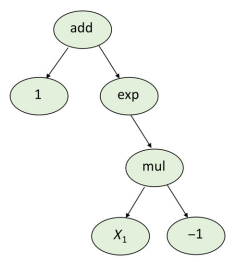

This tree represents the expression $1+exp(-x_1)$.

**1.**   A random population of trees is generated.

*   Each tree represents a potential solution of the problem.
*   This starting population typically has a large variety of tree
structures due to the random process, which reduces the risk of becoming trapped in local minima.

**2.**   The **fitness** of each tree in the initial popualtion is evaluated by comparing their output with the data.

*   The fitness of a tree describes how well it solves the problem.
*   Common choices for this fitness metric are MSE and RMSE.

**3.**   GP then evolves the current generation of trees through operations such as **mutations** and **crossovers**, generating new trees.

The fitness of the trees in this new generation are evaluated and the 
process repeats, until either a certain fitness is reached, a maximum number of generations is reached, or a set amount of time has elapsed.

## **Details of Step 3**

## **Mutation**

A mutation takes a parent tree and randomly substitutes a sub-tree with another randomly generated structure.

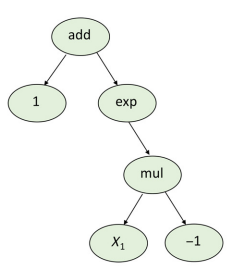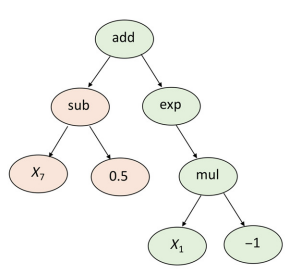

In the case above, the constant 1 is mutated to $(x_7-0.5)$.

Although this operation is more aggressive than the crossover operation, since it adds randomness to the system, it is important to have a finite chance of mutation to introduce new variations, e.g., new
constants and new features, and avoid being trapped in local minima.

## **Crossover**

Two parent trees which fit the data well (winners of tournaments) can be selected for a crossover. In a crossover, a subtree from one parent is randomly swapped for another subtree from the other parent.

An example of a crossover is shown below.

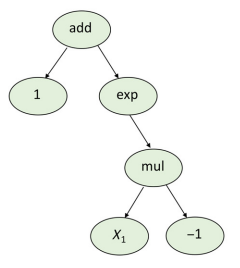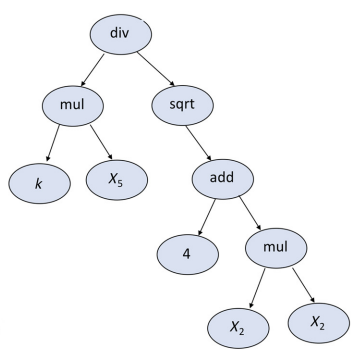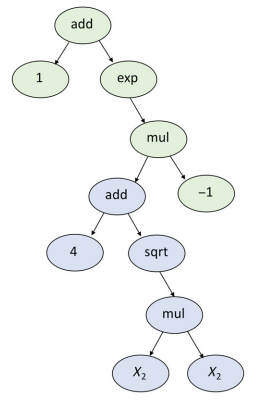



*   Parent 1: $1+exp(-x_1)$
*   Parent 2: $\frac{kx_5}{\sqrt{4+x_2^2}}$
*   Offspring: $1+exp(-\sqrt{4+x_2^2})$


## **Tournament**


A tournament is another technique by which trees are evolved from one generation to the next.

Initially, when GP randomly initialises trees, they are often not grouped in a single population, but rather several separate populations.

The 'fittest' trees from each subpopulation are then pinned against each other, annd the 'winners' are selected for crossovers.

## **Migration**

Once all evolutionary techniques (mutations, tournaments, crossovers) have been applied, migrations occurs before the next iteration.

This is when the worst tree in a subpopulation is replaced by a copy of the 'fittest' tree from another subpopulation.

## **Local Search Methods**

## **Hill Climbing**

Hill climbing is a local search method which tunes the constants of the trees by comparing it to neighbouring states and evaluating the fitness of the neighbouring trees.


*   It iteratively searches other feasible solutions in the neighbourhood and selects the one with the hghest fitness.
*   The process terminates when there are no more local moves that result in an improved fitness.

This is a fast method, but has the disadvantage of becoming trapped in local minima.

## **Simulated Annealing**

Simulated annealing is similar to hill climbing, with the one difference being that 'backwards' or 'sideways' moves are permitted.

*   A **temperature** paramter can be used to allow 'backwards' or 'sideways' moves. These are moves that do not result in an improved fitness.
*   A high temperature allows for these non-improving moves, and a low temperature makes them less likely to occur.
*   GP agorithms that employ simulated annealing often start with a high temperature, which is then lowered towards the end.

This makes it less likely for the algorithm to become trapped in local minima.

## **Gradient Descent**

The gradients of the loss (often MSE) with respect to the constants in the tree are calculated.

The values of those constants can then be trained using the following rule.

$C_k←C_k - α\frac{∂MSE}{∂C_k}$

where $α$ is the learning rate and $k$ spans the number of constants in the tree.


*   For a constant $C_k$ in the tree, its updated value is calculated using the equation above.
*   If the MSE of the new tree is worse than the original one, $C_k$ is not updated.
*   The process is repeated for the next constant $C_{k+1}$.
*   Once all the constants have been trained, the next tree is then trained.





Note that the evolution of the solutions from one generation to the next are still governed by the genetic beam search (mutations, crossovers, tournaments, migrations) - these local techniques (hill climbing, simulated annealing, gradient descent) used to improve efficiency are only applied to individual trees within a generation.

## **Why use Symbolic Rgeression?**

Do you have any *a-priori* knowledge of the structure and/or basis functions of the model?

*   If yes, then **SINDy** is a fast and effective choice for system identification.
*   If no, then SR is more suitable.

SINDy, while very powerful, has its limitations.

*   It is assumed that the model can be expressed as a linear combination of the basis functions (**nested** models are not explored).
*   Funtions with real-valued arguments/exponents will likely not be included in the SINDy dictionary.

If you have no *a-priori* knowledge of the model to be discovered, and it is possible that the model could contain nested functions and/or functions with real-valued arguments, SR will outperform SINDy.



## **Literature**



*   Original GP paper: [Koza (1994)](https://link.springer.com/content/pdf/10.1007/BF00175355.pdf)
*   Paper explaining hill climbing and simulated annealing: [Mauša, Grbac, Bašić, Pavević (2013)](https://ieeexplore.ieee.org/abstract/document/6625021)
*   Paper explaining gradient descent for SR: [Chen, Xue, Zhang (2015)](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7257017)
*   Well written paper explaining SR in general: [Wang, Wagner, Rondinelli (2019)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/A5836F4AF5E9395A9B27541C5042A7F3/S2159685919000855a.pdf/symbolic_regression_in_materials_science.pdf)





## **PySR**

PySR is an open-source SR package in Python (https://github.com/MilesCranmer/PySR) with a Julia backend (https://github.com/MilesCranmer/SymbolicRegression.jl).

It includes tournaments, migrations and also uses simulated annealing as a local search method. There are many tunable hyperparameters.

It's performance is said to match the gold standard for SR (Eureqa) on average, and also outperform it in some cases.

## **PySR Experiments**

## **Introductory Example**

Consider the toy model with 5 input features $x_1,..,x_5$:

$y = 2cos(0.45x_3) + x_0^2 - 2$

In [ ]:
import numpy as np
from pysr import PySRRegressor

In [ ]:
X = 2 * np.random.randn(100, 5)
y = 2 * np.cos(0.45*X[:, 3]) + X[:, 0] ** 2 - 2

In [ ]:
model = PySRRegressor(
    niterations=10,
    populations=20,
    binary_operators=["*", "/","-","+"],
    unary_operators=["cos","sin","exp"],
    model_selection="best",
)

In [ ]:
model.fit(X,y)

**Best model discovered:**

$(x_0 \times x_0) + 2 \times cos(x_3 \times 0.44999522) - 1.9999937$

## **A Weird Lorenz-63 Model**

$\frac{dx}{dt}=10(exp(0.35y)-x)$

$\frac{dy}{dt}=x(28-z)-y$

$\frac{dz}{dt}=xy - \frac{8}{3}exp(0.1z)$

$[x_0,y_0,z_0]=[-8,8,27]$

In [ ]:
def lorenz(X):
  x = X[:,0]
  y = X[:,1]
  z = X[:, 2]
  return np.array([10*(np.exp(0.35*y)- x),
                  x*(28 - z) - y,
                  x*y - (8/3)*np.exp(0.1*z)])

In [ ]:
X = 2 * np.random.randn(100, 3)
dX = lorenz(X).T

In [ ]:
model.fit(X,dX)

**Best models discovered**

---


No noise: 

$10(exp(0.34999856y) - x)$,
$x(28.000002 - z) - y$,
$xy - exp(0.09999845z + 0.98082334)$


---
1% noise:

$10.00045(exp(0.34999555y) - x)$,
$x(28.004105 - z) - y$,
$xy - exp(0.10018505z + 0.98034245)$


---
5% noise:

$10.002634(exp(0.3495999y) - x)$,
$x(27.999813 - z) - y$,
$xy - exp(0.10047387z + 0.9813854)$


---
True model:

$10(exp(0.35y) - x)$,
$x(28 - z) - y$,
$xy - exp(0.1z + 0.980829253)$




## **Symbolic Regression + Deep Learning**

**Motivation:** SR is interpretable and generalises well, but it isn't tractable for high dimensional problems. **Deep learning** precisely complements this, as it isn't interpretable,
doesn't generalise well, but is good at high dimensional problems.

*Can they be combined?*



High dimensional data → SR won't work

High dimensional data → NN to learn a low dimensional representation of the data → SR will work

Paper: [Cranmer (2020)](https://proceedings.neurips.cc/paper/2020/file/c9f2f917078bd2db12f23c3b413d9cba-Paper.pdf)



**Method:**

**1.**   Create a NN with separable internal functions.

**2.**   Each internal function operates on a low-dimensional space (sparsity is encouraged).

**3.**   Train the NN.

**4.**   Apply SR to each internal function.

**5.**   Compose the symbolic expressions.


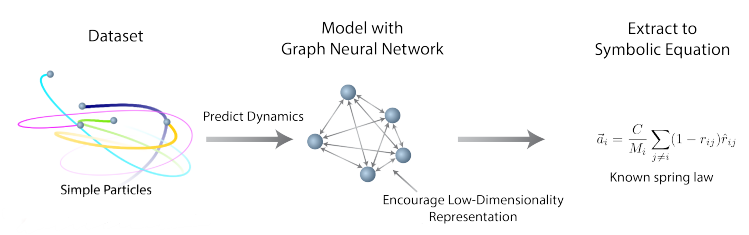

A Graph NN (GNN) is used as it's structure can represent iteracting particles (messages between nodes describe forces).

A GNN has:
*   An edge model (MLP)
*   A node model (MLP)

These are the separate internal functions in the network architecture.

**Dark matter problem**

This method was used to predict dark matter overdensity in a given halo from neighbouring halos.

Halos are treated as interacting particles.

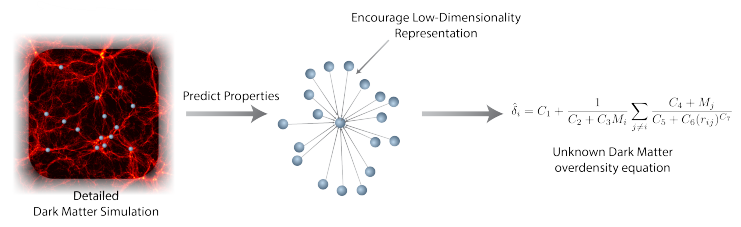

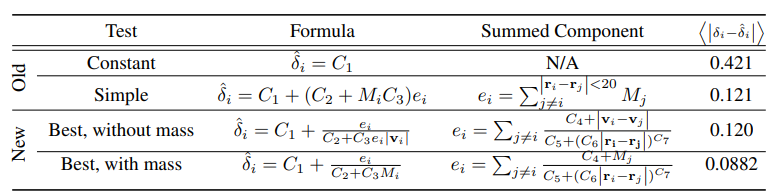

Discovered equation is "Best, with mass", and has lower error than the hand-designed formula by scientists.

The method allows for a discussion about what the NN has learnt.

## **SR for PDEs**

Paper: [Maslyaev (2019)](https://arxiv.org/pdf/1903.08011.pdf)

**Method:**

**1.**   Solve PDE to obtain solution $u(t,x)$

**2.**   Use finite differences to obtain time and spatial derivatives $u_t, u_x, u_{tt}, u_{xx},...$

**3.**   Build vectors of features, e.g. $u_xu_t$ (this defines the mathematical expression space).

**4.**   Build initial population of trees.

**5.**   Do sparse regression on each tree to find leading features.

**6.**   Carry out evolutionary steps (tournaments, crossovers, mutations).

**7.**   Do sparse regression on fittest tree in the population.

**8.**   If step 7 produces a tree that meets a fitness threshold, or a maximum number of iterations is reached, the process stops. If not, repeat from step 5.


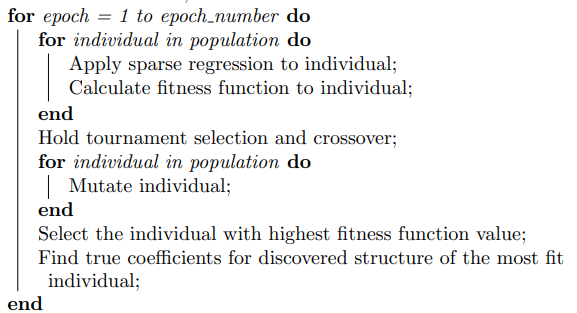

**Results**

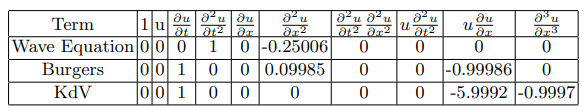

**Note:** Algorithm does not work as well with noisy data and/or a reduction of the studied space.

## **Final Remarks:**

*   SR, although less efficient, is extremely useful when SINDy isn't suitable.
*   I found that SR doesn't do as well when the input data is a time series rather than randomly sampled points.
*   The combination of SR with deep learning can be very powerful.
*   I am working on using a NN to discover a model which is too high dimensional for PySR.





## **Grey Box Modelling**

Universal Differential Equations (UDEs): [Rackauckas (2020)](https://arxiv.org/pdf/2001.04385.pdf)


*   In PINNs, the **solution** of a differential equation is approximated with a NN
*   IN UDEs, (part of) the differential equation **model** is approximated with a NN.

**UDE Method:**


**1.**   Replace unnown parts of the model with a NN.

**2.**   Train the NN to capture the missing dynamics of the model.

**3.**   Use SR to distill an analytic expression from the trained NN.



$E = exp(-80(mod(t,0.75)-0.375)^2)$

$P_{lv} = 2.8798x_3 + 0.1203(1-e)(NN_1-1)$

$P_{ao} = NN_2$ 

$P{pu}=0.0073x_4-4$

$\frac{dx_1}{dt}=100-x_2$

$\frac{dx_2}{dt}=\frac{(P_{pu}-P_{lv}-0.0158x_2)}{0.000076968}$

$\frac{dx_3}{dt}=x_2-x_4$

$\frac{dx_4}{dt}=\frac{P_{lv}-P_{ao}-0.018x_4}{0.00012189}$

$\frac{dx_5}{dt}=x_4 - 90$



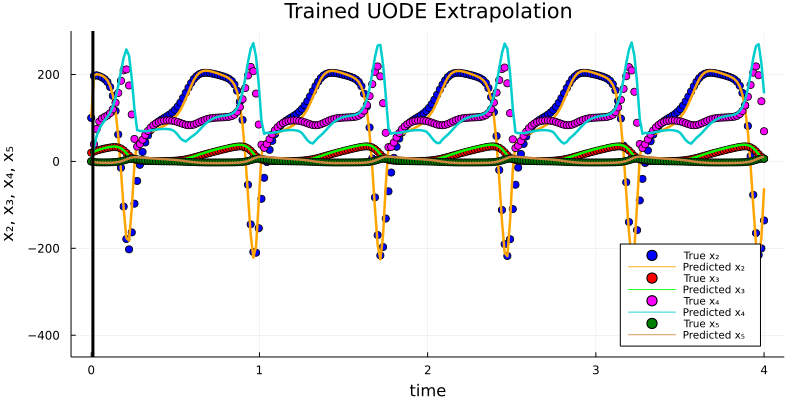

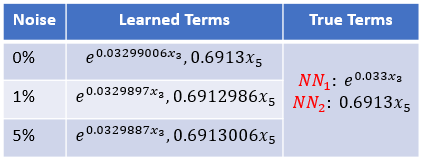

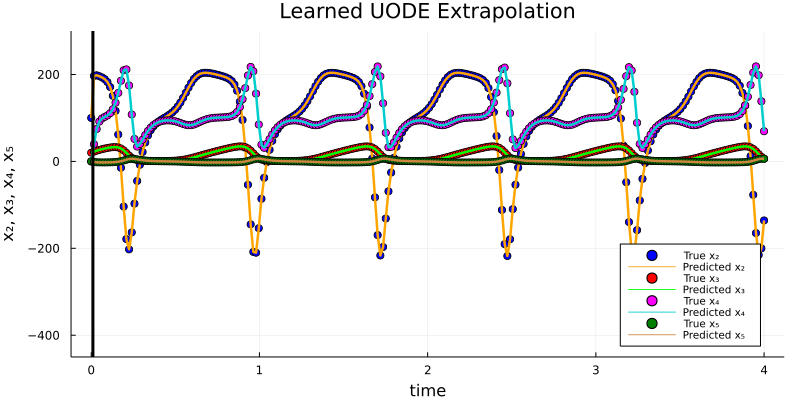